<a href="https://colab.research.google.com/github/ark150/PracticaSIDI2Semana1/blob/master/Sist_Dist_semana_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Resumen de la 3 semana

arreglos ultidimensionales con numpy y dask

dataframes con pandas y dask

leyendo multiples archivos de texto (.csv)

construyendo flujos retrasados

cronometraje de operaciones con dataframes, pandas, vs .dask

cuando usar pandas y cuando usar dask 

In [0]:
import os
plantilla = 'yellow_tripdata_2018-{:02d}.csv'
plantillaURL = 'wget https://s3.amazonaws.com/nyc-tlc/trip+data/'+plantilla
urls = (plantillaURL.format(k) for k in range(1,3))
for url in urls:
  os.system(url)

realizar esto con los 12 meses y los años 14,15,16,17,18

In [4]:
ls

sample_data/  yellow_tripdata_2018-01.csv  yellow_tripdata_2018-02.csv


In [0]:
import pandas as pd

In [6]:
df = pd.read_csv('yellow_tripdata_2018-01.csv')
df.shape

(8759874, 17)

In [17]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'tip_fraction'],
      dtype='object')

In [9]:
ls

sample_data/  yellow_tripdata_2018-01.csv  yellow_tripdata_2018-02.csv


In [13]:
df['payment_type'].value_counts()

1    6105871
2    2598947
3      43204
4      11852
Name: payment_type, dtype: int64

calcular la fraccion del moeno total del viaje que corresponde a la propina

$f_p = \frac{propina}{total-propina}$


In [0]:
df['tip_fraction']= df['tip_amount']/(df['total_amount']-df['tip_amount'])

In [18]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'tip_fraction'],
      dtype='object')

In [0]:
df['tpep_dropoff_datetime']= pd.to_datetime(df['tpep_dropoff_datetime'])

In [0]:
df['hour']=df['tpep_dropoff_datetime'].dt.hour

In [53]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'tip_fraction', 'hour'],
      dtype='object')

In [0]:
credito = df[df.payment_type==1]

In [24]:
credito.shape

(6105871, 19)

In [0]:
porHora =credito.groupby('hour')

In [0]:
resultado=porHora['tip_fraction'].mean()

In [57]:
resultado.shape

(24,)

In [0]:
import matplotlib.pyplot as plt

In [0]:
resultado.plot.line(style="-o", figsize=(15,5))
plt.ylabel('fraccion de propina')

promedio de numero de pasajeros por hora

In [0]:
porHorasP =df.groupby('hour')

In [0]:
numPasajerosPorHoras=porHorasP['passenger_count'].mean()

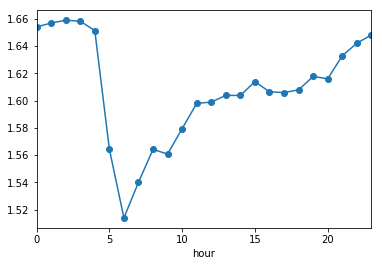

In [61]:
numPasajerosPorHoras.plot.line(style="-o")


como agregariamos por dia?

In [0]:
df['weekday'] = df['tpep_dropoff_datetime'].dt.weekday

In [0]:
weekDayPU = df.groupby('weekday')
weekDayPUCount=weekDayPU['passenger_count'].mean()

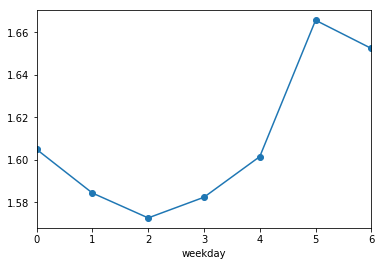

In [66]:
weekDayPUCount.plot.line(style="-o")

tarea sobreponer las graficas de los 2 meses enero y febrero de la funcion de arriba

##reproducciomos el ejercicio de la propina usando dask

In [0]:
import dask.dataframe as dd

In [0]:
df = dd.read_csv("yellow_tripdata_2018-*.csv", assume_missing=True)

In [0]:
df['tip_fraction']= df['tip_amount']/(df['total_amount']-df['tip_amount'])

In [0]:
df['tpep_dropoff_datetime']= dd.to_datetime(df['tpep_dropoff_datetime'])
df['hour']=df['tpep_dropoff_datetime'].dt.hour

In [73]:
df.hour

Dask Series Structure:
npartitions=25
    int64
      ...
    ...  
      ...
      ...
Name: hour, dtype: int64
Dask Name: getitem, 375 tasks

In [74]:
credit = df[df.payment_type==1]
hour = credit.groupby('hour')
resultado = hour['tip_fraction'].mean()
type(resultado)

dask.dataframe.core.Series

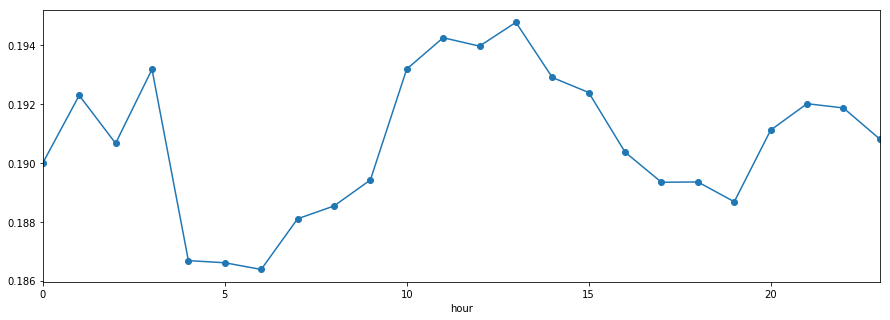

In [75]:
tip_frac = resultado.compute()
tip_frac.plot.line(style="-o", figsize=(15,5))

procesar los 12 archivos en pandas y en dask lo de las 2 graficas 

una base de datos alternativa a los viajes e taxi


In [76]:
!wget http://s3.amazonaws.com/datashader-data/nyc_taxi.zip && unzip nyc_taxi.zip

--2019-06-11 17:01:53--  http://s3.amazonaws.com/datashader-data/nyc_taxi.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.98.53
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.98.53|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 432291366 (412M) [application/zip]
Saving to: ‘nyc_taxi.zip’

nyc_taxi.zip        100%[===================>] 412.26M  93.7MB/s    in 4.4s    

2019-06-11 17:01:58 (94.7 MB/s) - ‘nyc_taxi.zip’ saved [432291366/432291366]

Archive:  nyc_taxi.zip
  inflating: nyc_taxi.csv            


In [77]:
!unzip nyc_taxi.zip

Archive:  nyc_taxi.zip
replace nyc_taxi.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [78]:
!ls -alp

total 3382684
drwxr-xr-x 1 root root       4096 Jun 11 17:01 ./
drwxr-xr-x 1 root root       4096 Jun 11 15:27 ../
drwxr-xr-x 1 root root       4096 Jun  7 16:07 .config/
drwxr-xr-x 2 root root       4096 Jun 11 15:31 .ipynb_checkpoints/
-rw-r--r-- 1 root root 1510609630 Feb  5  2016 nyc_taxi.csv
-rw-r--r-- 1 root root  432291366 Apr 12  2017 nyc_taxi.zip
drwxr-xr-x 1 root root       4096 May 31 16:17 sample_data/
-rw-r--r-- 1 root root  772098307 Aug  3  2018 yellow_tripdata_2018-01.csv
-rw-r--r-- 1 root root  748827487 Aug  3  2018 yellow_tripdata_2018-02.csv


In [79]:
!wc nyc_taxi.csv

  10679308   32037922 1510609630 nyc_taxi.csv


In [93]:
archivoCargado = pd.read_csv('nyc_taxi.csv')
archivoCargado.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'pickup_x', 'pickup_y',
       'RateCodeID', 'store_and_fwd_flag', 'dropoff_x', 'dropoff_y',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount'],
      dtype='object')

In [80]:
%time df = pd.read_csv('nyc_taxi.csv', usecols=['dropoff_x', 'dropoff_y'])
df.tail()

CPU times: user 12.8 s, sys: 1.34 s, total: 14.2 s
Wall time: 14.1 s


,dropoff_x,dropoff_y
10679302,-8.232492e+06,4.979234e+06
10679303,-8.234857e+06,4.971131e+06
10679304,-8.234203e+06,4.981092e+06
10679305,-8.235618e+06,4.973722e+06
10679306,-8.234152e+06,4.977120e+06


In [91]:
df.columns

Index(['dropoff_x', 'dropoff_y'], dtype='object')

In [0]:
from bokeh.models import BoxZoomTool
from bokeh.plotting import figure, output_notebook, show

In [0]:
NYC = x_range, y_range = ((-8242000,-8210000), (4965000,4990000))

plot_width  = int(750)
plot_height = int(plot_width//1.2)

def base_plot(tools='pan,wheel_zoom,reset',plot_width=plot_width, plot_height=plot_height, **plot_args):
    p = figure(tools=tools, plot_width=plot_width, plot_height=plot_height,
        x_range=x_range, y_range=y_range, outline_line_color=None,
        min_border=0, min_border_left=0, min_border_right=0,
        min_border_top=0, min_border_bottom=0, **plot_args)

    p.axis.visible = False
    p.xgrid.grid_line_color = None
    p.ygrid.grid_line_color = None

    p.add_tools(BoxZoomTool(match_aspect=True))

    return p

options = dict(line_color=None, fill_color='blue', size=5)

In [92]:
from bokeh.tile_providers import STAMEN_TERRAIN
output_notebook()
muestras = df.sample(n=10000)
p= base_plot()
p.add_tile(STAMEN_TERRAIN)
p.circle(x=muestras['dropoff_x'], y=muestras['dropoff_y'], **options)
show(p)

Loading BokehJS ...